<a href="https://colab.research.google.com/github/hassanaftab93/MyMasjid-Logs/blob/main/Logs_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logs Analysis

## Installation of Libraries

In [ ]:
!pip install --upgrade pandas
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install zipfile-deflate64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.7 MB/s 


In [3]:
!pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
from google.colab import files

In [5]:
import glob
from zipfile import ZipFile
import zipfile_deflate64 as zipfile
from pathlib import Path
import os
import fnmatch
import csv
import re
from dask import dataframe as daskd

## [NEW] Configuring Google Cloud Storage Access



---



In [6]:
from google.colab import auth
auth.authenticate_user()

In [7]:
!curl https://sdk.cloud.google.com | bash

Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/surface/run/services/update_traffic.py
google-cloud-sdk/lib/surface/runtime_config/__init__.py
google-cloud-sdk/lib/surface/runtime_config/configs/__init__.py
google-cloud-sdk/lib/surface/runtime_config/configs/create.py
google-cloud-sdk/lib/surface/runtime_config/configs/delete.py
google-cloud-sdk/lib/surface/runtime_config/configs/describe.py
google-cloud-sdk/lib/surface/runtime_config/configs/list.py
google-cloud-sdk/lib/surface/runtime_config/configs/update.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/__init__.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/describe.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/get_value.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/list.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/set.py
google-cloud-sdk/lib/surface/runtime_config/configs/variables/unset.py
google-cloud-sdk/lib/surfa

In [8]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
core:
  account: hassanaftab.pk@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for this 
configuration:
 [1] hassanaftab.pk@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [hassanaftab.pk@gmail.com].

Pick cloud project to use: 
 [1] my-masjid-0786
 [2] Enter a project ID
 [3] 

### Google Colab -> <- GCP

Google Cloud -> Colab

`!gsutil cp [GCP Storage path] [Copy to where?]` <br>
e.g <br>
`!gsutil cp gs://maskaravivek-data/data_file.csv .`

Colab -> Google Cloud

`gsutil cp [File] [GCP Storage path]` <br>
e.g <br>
`gsutil cp test.csv gs://maskaravivek-data/`

## Copying all Raw Logs data from GCP Storage

In [9]:
!gsutil ls

gs://mymasjid-logs-october/
gs://mymasjid-raw-logs/


In [10]:
mkdir zipped_files

In [11]:
!gsutil cp gs://mymasjid-raw-logs/'MM Log files'/* ./zipped_files/

Copying gs://mymasjid-raw-logs/MM Log files/01 January.zip...
Copying gs://mymasjid-raw-logs/MM Log files/02 February.zip...
Copying gs://mymasjid-raw-logs/MM Log files/03 March.zip...
Copying gs://mymasjid-raw-logs/MM Log files/04 April.zip...
- [4 files][859.0 MiB/859.0 MiB]   50.2 MiB/s                                   
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://mymasjid-raw-logs/MM Log files/05 May.zip...
Copying gs://mymasjid-raw-logs/MM Log files/06 June.zip...
Copying gs://mymasjid-raw-logs/MM Log files/07 July.zip...
Copying gs://mymasjid-raw-logs/MM Log files/08 August.zip...
Copying gs://mymasjid-raw-logs/MM Log files/09 September.zip...
Copying gs://mymasjid-raw-logs/MM Log files/10 October.zip...
- [10 files][  2.2 GiB/  2.2 GiB]   38.6 MiB/s             

## Checking copied files in working repo

In [12]:
rm -rf sample_data

In [13]:
cd zipped_files

/content/zipped_files


In [21]:
ls

'10 October.zip'


In [22]:
cd ..

/content


## Extracting the Log files from the Zip files into the Extracted Logs folder

In [ ]:
#cd ../content

In [23]:
mkdir extracted_logs

In [24]:
raw_data = ""
directory_to_unzip = './zipped_files'
directory_to_extract_to = './extracted_logs'

In [25]:
for filename in os.scandir(directory_to_unzip):
    if filename.is_file():
        path_to_zip_file = filename.path
        with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
          zip_ref.extractall(directory_to_extract_to)

## Renaming of Extensions: .log -> .txt Files

In [26]:
cd extracted_logs

/content/extracted_logs


In [27]:
def change(old_ext,new_ext):
	[ os.rename( f,"%s.%s" % (os.path.splitext(f)[0],new_ext) ) for f in glob.glob(os.getcwd() + "/*." + old_ext) ]

In [28]:
change("log","txt")

## Checking extracted files

In [29]:
ls

u_ex220930.txt  u_ex221004.txt  u_ex221008.txt  u_ex221012.txt  u_ex221016.txt
u_ex221001.txt  u_ex221005.txt  u_ex221009.txt  u_ex221013.txt
u_ex221002.txt  u_ex221006.txt  u_ex221010.txt  u_ex221014.txt
u_ex221003.txt  u_ex221007.txt  u_ex221011.txt  u_ex221015.txt


In [30]:
cd ..

/content


In [31]:
ls

extracted_logs/  zipped_files/


In [32]:
rm -rf zipped_files

In [33]:
ls

extracted_logs/


---

## Removing redundant data from files and delimiting the files

In [34]:
new_file_var=""

In [39]:
files_count = 0
for files in os.scandir("./extracted_logs"):
  files_count += 1
print("Total Files in Extracted_Logs Folder: ",files_count)

Total Files in Extracted_Logs Folder:  17


In [40]:
count = 0

for files in os.scandir("./extracted_logs"):

  with open(files, mode='r') as f:
    new_file_var = f.read()
    new_file_var = new_file_var[106:]
    new_file_var = re.sub("[,]", "", new_file_var)
    new_file_var = re.sub("[ ]", ",", new_file_var)
    with open('aggregated_file.csv', 'a') as w:
      w.write(new_file_var)
      #w.write("\n")
      count+=1
      print("\nFiles appended: ",count,"/",files_count,"\t File Name:",files)
    new_file_var=""
  
  # For file testing purposes
  #if(count==2):
   # break


Files appended:  1 / 17 	 File Name: <DirEntry 'u_ex221016.txt'>

Files appended:  2 / 17 	 File Name: <DirEntry 'u_ex221011.txt'>

Files appended:  3 / 17 	 File Name: <DirEntry 'u_ex220930.txt'>

Files appended:  4 / 17 	 File Name: <DirEntry 'u_ex221014.txt'>

Files appended:  5 / 17 	 File Name: <DirEntry 'u_ex221013.txt'>

Files appended:  6 / 17 	 File Name: <DirEntry 'u_ex221004.txt'>

Files appended:  7 / 17 	 File Name: <DirEntry 'u_ex221007.txt'>

Files appended:  8 / 17 	 File Name: <DirEntry 'u_ex221010.txt'>

Files appended:  9 / 17 	 File Name: <DirEntry 'u_ex221002.txt'>

Files appended:  10 / 17 	 File Name: <DirEntry 'u_ex221003.txt'>

Files appended:  11 / 17 	 File Name: <DirEntry 'u_ex221001.txt'>

Files appended:  12 / 17 	 File Name: <DirEntry 'u_ex221006.txt'>

Files appended:  13 / 17 	 File Name: <DirEntry 'u_ex221009.txt'>

Files appended:  14 / 17 	 File Name: <DirEntry 'u_ex221012.txt'>

Files appended:  15 / 17 	 File Name: <DirEntry 'u_ex221015.txt'>

Fil

In [ ]:
rm -rf extracted_logs

---

## Importing CSV files into Dataframe

In [41]:
filedata="./aggregated_file.csv"

In [43]:
logs=pd.read_csv(filedata,error_bad_lines=False)
#logs=daskd.read_csv(filedata)
#logs = pd.read_csv(filedata, chunksize=10000, error_bad_lines=False, engine='python')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 415066: expected 15 fields, saw 16\n'
b'Skipping line 961205: expected 15 fields, saw 16\n'
b'Skipping line 2036263: expected 15 fields, saw 16\n'
b'Skipping line 2488122: expected 15 fields, saw 16\n'
b'Skipping line 3005235: expected 15 fields, saw 16\n'
b'Skipping line 3513660: expected 15 fields, saw 16\n'
b'Skipping line 5759506: expected 15 fields, saw 16\n'
b'Skipping line 6748618: expected 15 fields, saw 16\n'
b'Skipping line 7169365: expected 15 fields, saw 16\nSkipping line 7195722: expected 15 fields, saw 16\n'
b'Skipping line 7604250: expected 15 fields, saw 16\n'
b'Skipping line 8130339: expected 15 fields, saw 16\n'
b'Skipping line 8639915: expected 15 fields, saw 16\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/in

## Basic Exploratory Analysis

In [45]:
# for chunk in logs:
#   print(chunk.iloc[0])

In [46]:
logs.head()

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-10-16,00:00:00,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=8633067e-9d05-4a65-a0a0-a8499305f9ff,443,-,192.38.129.198,okhttp/4.9.0,-,200,0,0,140
1,2022-10-16,00:00:00,144.76.234.124,GET,/assets/fonts/montserrat/montserrat-extrabold-...,-,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,156
2,2022-10-16,00:00:00,144.76.234.124,GET,/ngsw.json,ngsw-cache-bust=0.1322625226362878,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,156
3,2022-10-16,00:00:00,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=4cf1bfce-34cf-4bd3-ab85-e380ee4d94e8,443,-,192.38.129.57,okhttp/4.9.0,-,200,0,0,156
4,2022-10-16,00:00:00,144.76.234.124,GET,/assets/audio/sound_adhan.mp3,-,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,250


In [47]:
logs.dtypes

date               object
time               object
s-ip               object
cs-method          object
cs-uri-stem        object
cs-uri-query       object
s-port             object
cs-username        object
c-ip               object
cs(User-Agent)     object
cs(Referer)        object
sc-status          object
sc-substatus       object
sc-win32-status    object
time-taken         object
dtype: object

In [48]:
logs.describe()

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
count,8651111,8651111,8651098,8651085,8651085,8651085,8651072,8651072,8651072,8651072,8651072,8651072,8651072,8651072,8651072
unique,21,86415,11,5,2824,774920,5,2,107247,8356,2566,22,5,21,129575
top,2022-10-02,16:17:14,144.76.234.124,GET,/api/MessagesInfoScreen/GetActiveMessagesCount...,-,443,-,188.181.122.11,okhttp/4.9.0,-,200,0,0,46
freq,585196,1132,8651056,8499180,1343041,3567374,7602119,8651056,244681,1258817,2031470,5667381,7324559,7097460,531854


In [49]:
test_empty_logs = logs[logs['cs(Referer)']=='-']
test_empty_logs['cs(Referer)'].value_counts()

-    2031470
Name: cs(Referer), dtype: int64

## Missing Percentages of Columns

In [50]:
missing_percentages = logs.isna().sum().sort_values(ascending=False) / len(logs)
missing_percentages*100

s-port             0.000451
cs-username        0.000451
c-ip               0.000451
cs(User-Agent)     0.000451
cs(Referer)        0.000451
sc-status          0.000451
sc-substatus       0.000451
sc-win32-status    0.000451
time-taken         0.000451
cs-method          0.000301
cs-uri-stem        0.000301
cs-uri-query       0.000301
s-ip               0.000150
date               0.000000
time               0.000000
dtype: float64

## Missing Values in the Data (Bar chart)

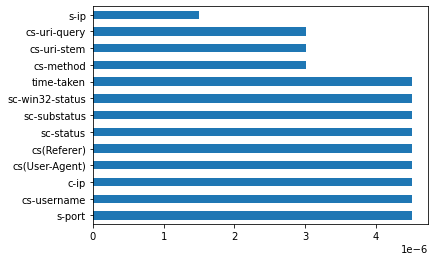

In [51]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

## Columns in CSV

In [52]:
logs.columns

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

In [53]:
Statuses = logs['sc-status']
Statuses = Statuses.unique()
len(Statuses)

23

In [54]:
Statuses

array([200, 400, 304, 206, 500, 429, 401, 301, 502, 404, '200', '304',
       '429', '206', '400', '502', '500', '301', nan, 'sc-status', 416,
       '401', '404'], dtype=object)

In [55]:
Status_Counts=logs['sc-status'].value_counts()
Status_Counts

200          5667381
206          1077574
200           861234
304           429641
502           277958
400           139550
206           132058
304            52724
429             6732
500             2495
400             1269
401              734
429              587
301              397
500              320
401              133
301              106
502               97
404               34
416               21
sc-status         16
404               11
Name: sc-status, dtype: int64

In [56]:
Status_Counts = pd.DataFrame(Status_Counts)

In [57]:
column_names=['Status']
Status_Counts.columns = column_names

In [58]:
Status_Counts.describe()

,Status
count,2.200000e+01
mean,3.932305e+05
std,1.213453e+06
min,1.100000e+01
25%,1.127500e+02
50%,1.001500e+03
75%,1.376770e+05
max,5.667381e+06


In [59]:
Status_Counts.columns

Index(['Status'], dtype='object')

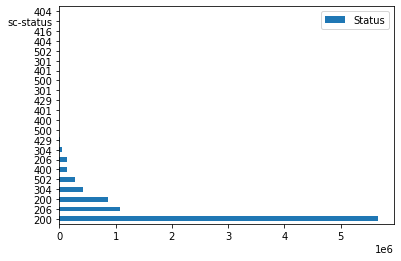

In [60]:
Status_Counts.plot(kind='barh')

# Cleaning Data

In [61]:
logs.columns

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

## Date Column

In [62]:
Dates=logs['date'].value_counts()
Dates

2022-10-02    585196
2022-09-30    574981
2022-10-07    551385
2022-10-01    544025
2022-10-03    541870
2022-10-10    536900
2022-10-09    519802
2022-10-14    515484
2022-10-11    515313
2022-10-08    511760
2022-10-05    507601
2022-10-04    501170
2022-10-06    481380
2022-10-16    458701
2022-10-13    450031
2022-10-12    430854
2022-10-15    424603
date              16
#Software:        13
#Date:            13
#Version:         13
Name: date, dtype: int64

In [63]:
logs = logs[logs.date != 0]

In [64]:
logs = logs[logs.date != '#Software:']
logs = logs[logs.date != '#Version:']
logs = logs[logs.date != '#Date:']
logs = logs[logs.date != 'date']
logs = logs[logs.date != '#Fields:']

In [65]:
Dates=logs['date'].value_counts()
Dates

2022-10-02    585196
2022-09-30    574981
2022-10-07    551385
2022-10-01    544025
2022-10-03    541870
2022-10-10    536900
2022-10-09    519802
2022-10-14    515484
2022-10-11    515313
2022-10-08    511760
2022-10-05    507601
2022-10-04    501170
2022-10-06    481380
2022-10-16    458701
2022-10-13    450031
2022-10-12    430854
2022-10-15    424603
Name: date, dtype: int64

## Time Column

In [66]:
Times=logs['time'].value_counts()
Times

16:17:14    1132
16:30:42    1094
16:40:21    1045
17:52:42     988
16:56:21     944
            ... 
07:04:33       4
07:27:34       4
07:05:50       3
06:59:31       2
08:48:49       2
Name: time, Length: 86400, dtype: int64

## s-ip Column

In [67]:
ServerIP=logs['s-ip'].value_counts()
ServerIP

144.76.234.124    8651056
Name: s-ip, dtype: int64

## cs-method Column

In [68]:
Methods=logs['cs-method'].value_counts()
Methods

GET     8499180
POST     151749
HEAD        127
Name: cs-method, dtype: int64

## cs-uri-stem Column

In [69]:
URI_Stem=logs['cs-uri-stem'].value_counts()
URI_Stem

/api/MessagesInfoScreen/GetActiveMessagesCountByMasjidId                                                                              1343041
/api/Masjid/GetDetaisByGuidId                                                                                                          935673
/ngsw.json                                                                                                                             732381
/api/Updates/GetUpdatedTimesofSystem                                                                                                   706038
/api/TimingsInfoScreen/GetMasjidTimings                                                                                                575939
                                                                                                                                       ...   
/widget/assets/css/assets/css/assets/fonts/montserrat/assets/fonts/montserrat/assets/css/assets/css/style.css                               1
/widge

## cs-uri-query Column

In [70]:
URI_Query=logs['cs-uri-query'].value_counts()
URI_Query

-                                                                                                        3567374
guidId=9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4                                                                86991
guidId=9224d024-22d3-4921-9035-85ce510ada05                                                                66285
masjidGuid=9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4&favoriteMasjids=                                           40212
masjidGuid=9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4                                                            38518
                                                                                                          ...   
ngsw-cache-bust=0.563992254858876                                                                              1
GuidId=8107912b-1637-4824-9279-07c57f8b2198&UserUniqueIdentifier=9c14cbc9-8cb8-4db5-96ea-17c910716a77          1
ngsw-cache-bust=0.07188208563691867                                                             

## s-port Column

In [71]:
Server_Port=logs['s-port'].value_counts()
Server_Port

443    7602119
443    1048433
80         398
80         106
Name: s-port, dtype: int64

## cs-username Column (Can drop, possibly)

In [72]:
User_Name=logs['cs-username'].value_counts()
User_Name

-    8651056
Name: cs-username, dtype: int64

## c-ip Column

In [73]:
Client_IP=logs['c-ip'].value_counts()
Client_IP

188.181.122.11    244681
82.18.185.220     135417
86.20.248.95       24808
92.27.100.5        22046
95.147.7.82        20244
                   ...  
37.171.172.249         1
90.248.22.140          1
198.166.206.20         1
86.24.21.105           1
197.186.28.108         1
Name: c-ip, Length: 107246, dtype: int64

## cs(User-Agent) Column

In [74]:
User_Agent=logs['cs(User-Agent)'].value_counts()
User_Agent

okhttp/4.9.0                                                                                                                         1258817
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_6_1+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML+like+Gecko)                                     1046430
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML+like+Gecko)                                        428471
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0_2+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML+like+Gecko)                                      275138
MyMasjid/1.8+(com.teo-intl.my-masjid;+build:9;+iOS+15.6.1)+Alamofire/4.7.3                                                            255979
                                                                                                                                      ...   
Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+CE;+IEMobile+6.12;+Microsoft+ZuneHD+4.3)                                                        1
SEC-SGHE900/1

## cs(Referer) Column

In [75]:
Referer=logs['cs(Referer)'].value_counts()
Referer

-                                                                                               2031470
https://time.my-masjid.com/ngsw-worker.js                                                       1444612
https://time.my-masjid.com/                                                                      365387
https://time.my-masjid.com/timingscreen/9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4?sound=0&isapp=1     274914
https://time.my-masjid.com/timingscreen/9224d024-22d3-4921-9035-85ce510ada05                     156738
                                                                                                 ...   
https://time.my-masjid.com/ngsw.json?ngsw-cache-bust=0.6356359503693769                               1
https://time.my-masjid.com/assets/fonts/montserrat/montserrat-semibold-webfont.woff2                  1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/weather-icons-wind.min.css             1
https://time.my-masjid.com/assets/scss/icons/weather-icons/css/w

## sc-status Column (Needs Cleaning, Where 'sc-status' == '404.0')

In [76]:
Status=logs['sc-status'].value_counts()
Status

200    5667381
206    1077574
200     861234
304     429641
502     277958
400     139550
206     132058
304      52724
429       6732
500       2495
400       1269
401        734
429        587
301        397
500        320
401        133
301        106
502         97
404         34
416         21
404         11
Name: sc-status, dtype: int64

In [77]:
logs404 = logs[logs['sc-status'] == 404]

In [78]:
logs404

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
103392,2022-10-16,07:00:33,144.76.234.124,GET,/.well-known/traffic-advice,-,443,-,74.125.208.48,Chrome+Privacy+Preserving+Prefetch+Proxy,-,404,0,2,15
162482,2022-10-16,11:21:26,144.76.234.124,GET,/.well-known/assetlinks.json,-,443,-,66.249.66.204,Mozilla/5.0+(compatible;+Googlebot/2.1;++http:...,-,404,0,2,93
661422,2022-10-11,13:04:14,144.76.234.124,GET,/.well-known/traffic-advice,-,443,-,74.125.208.48,Chrome+Privacy+Preserving+Prefetch+Proxy,-,404,0,2,15
662053,2022-10-11,13:05:30,144.76.234.124,GET,/.well-known/assetlinks.json,-,443,-,66.249.64.70,Mozilla/5.0+(compatible;+Googlebot/2.1;++http:...,-,404,0,2,93
1095352,2022-09-30,08:06:18,144.76.234.124,GET,/.well-known/traffic-advice,-,443,-,64.233.173.96,Chrome+Privacy+Preserving+Prefetch+Proxy,-,404,0,2,343
1170382,2022-09-30,11:30:03,144.76.234.124,GET,/.well-known/traffic-advice,-,443,-,66.249.93.52,Chrome+Privacy+Preserving+Prefetch+Proxy,-,404,0,2,15
1331057,2022-09-30,16:48:29,144.76.234.124,GET,/.well-known/assetlinks.json,-,443,-,66.249.76.148,Mozilla/5.0+(compatible;+Googlebot/2.1;++http:...,-,404,0,2,15
1773913,2022-10-14,12:20:05,144.76.234.124,GET,/.well-known/assetlinks.json,-,443,-,66.249.76.148,Mozilla/5.0+(compatible;+Googlebot/2.1;++http:...,-,404,0,2,15
1933463,2022-10-14,17:10:33,144.76.234.124,GET,/.well-known/traffic-advice,-,443,-,74.125.208.48,Chrome+Privacy+Preserving+Prefetch+Proxy,-,404,0,2,15
2255514,2022-10-13,12:49:27,144.76.234.124,GET,/.well-known/assetlinks.json,-,443,-,66.249.76.146,Mozilla/5.0+(compatible;+Googlebot/2.1;++http:...,-,404,0,2,31


## sc-substatus Column

In [79]:
SubStatus=logs['sc-substatus'].value_counts()
SubStatus

0    7324559
0    1048442
3     277958
3         97
Name: sc-substatus, dtype: int64

## sc-win32-status Column

In [80]:
Win32_Status=logs['sc-win32-status'].value_counts()
Win32_Status

0        7097460
0        1041235
64        200365
12002      87417
12029      80300
12030      74372
1236       29317
121        24255
995         8693
64          4336
995         1391
121          936
1236         613
22           190
10054        103
2             34
12030         13
1450          11
2             11
12029          4
Name: sc-win32-status, dtype: int64

## time-taken Column

In [81]:
Time_Taken=logs['time-taken'].value_counts()
Time_Taken

46.0        531854
62.0        433988
78.0        359080
31.0        342955
93.0        284693
             ...  
200346.0         1
209962.0         1
171268.0         1
210055.0         1
97290.0          1
Name: time-taken, Length: 129574, dtype: int64

In [82]:
Time_test = logs[logs['time-taken'] == 0]
Time_test = Time_test[Time_test['sc-status'] == 200]

In [83]:
Time_test['time-taken'].value_counts()

0    659
Name: time-taken, dtype: int64

# Assigning Log Sections to Separate Data Frames grouped by Status + Type fixing

In [84]:
Status_Counts

,Status
200,5667381
206,1077574
200,861234
304,429641
502,277958
400,139550
206,132058
304,52724
429,6732
500,2495


## Aggregating all Statuses into respective DataFrames

In [85]:
Status_200_ints = logs[logs['sc-status'] == 200]
Status_200_strings = logs[logs['sc-status'] == '200']
Status_200 = Status_200_ints.append(Status_200_strings)
Status_200 = pd.DataFrame(Status_200)
Status_200['sc-status'].astype(int)
Status_200['sc-status'] = pd.to_numeric(Status_200['sc-status'])
Status_200.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
8191999,2022-10-05,03:19:41,144.76.234.124,GET,/assets/js/station-clock.js,-,443,-,172.219.14.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_6_1+like...,https://time.my-masjid.com/,200.0,0,0,171


In [86]:
Status_206_ints = logs[logs['sc-status'] == 206]
Status_206_strings = logs[logs['sc-status'] == '206']
Status_206 = Status_206_ints.append(Status_206_strings)
Status_206 = pd.DataFrame(Status_206)
Status_206['sc-status'].astype(int)
Status_206['sc-status'] = pd.to_numeric(Status_206['sc-status'])
Status_206.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
8191941,2022-10-05,03:19:38,144.76.234.124,GET,/assets/audio/sound_adhan.mp3,-,443,-,83.233.247.89,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_8_1+like...,https://time.my-masjid.com/timingscreen/b50740...,206.0,0,0,234


In [87]:
Status_301_ints = logs[logs['sc-status'] == 301]
Status_301_strings = logs[logs['sc-status'] == '301']
Status_301 = Status_301_ints.append(Status_301_strings)
Status_301 = pd.DataFrame(Status_301)
Status_301['sc-status'].astype(int)
Status_301['sc-status'] = pd.to_numeric(Status_301['sc-status'])
Status_301.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
8166437,2022-10-05,01:50:13,144.76.234.124,GET,/selectmasjid,-,80,-,65.109.63.252,Mozilla/5.0+(compatible;+MJ12bot/v1.4.8;+http:...,-,301.0,0,0,31


In [88]:
Status_304_ints = logs[logs['sc-status'] == 304]
Status_304_strings = logs[logs['sc-status'] == '304']
Status_304 = Status_304_ints.append(Status_304_strings)
Status_304 = pd.DataFrame(Status_304)
Status_304['sc-status'].astype(int)
Status_304['sc-status'] = pd.to_numeric(Status_304['sc-status'])
Status_304.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
8191972,2022-10-05,03:19:40,144.76.234.124,GET,/ngsw-worker.js,-,443,-,95.90.245.201,Mozilla/5.0+(Linux;+Android+11;+SM-G770F+Build...,https://time.my-masjid.com/ngsw-worker.js,304.0,0,0,31


In [89]:
Status_400_ints = logs[logs['sc-status'] == 400]
Status_400_strings = logs[logs['sc-status'] == '400']
Status_400 = Status_400_ints.append(Status_400_strings)
Status_400 = pd.DataFrame(Status_400)
Status_400['sc-status'].astype(int)
Status_400['sc-status'] = pd.to_numeric(Status_400['sc-status'])
Status_400.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
8188685,2022-10-05,03:13:51,144.76.234.124,GET,/assets/fonts/montserrat/montserrat-bold-webfo...,-,443,-,162.157.79.49,Mozilla/5.0+(Android+12;+Mobile;+rv:105.0)+Gec...,https://time.my-masjid.com/assets/fonts/montse...,400.0,0,64,0


In [90]:
#401
Status_401_ints = logs[logs['sc-status'] == 401]
Status_401_strings = logs[logs['sc-status'] == '401']
Status_401 = Status_401_ints.append(Status_401_strings)
Status_401 = pd.DataFrame(Status_401)
Status_401['sc-status'].astype(int)
Status_401['sc-status'] = pd.to_numeric(Status_401['sc-status'])
Status_401.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
8175808,2022-10-05,02:38:34,144.76.234.124,POST,/api/Salah/GetMasjidSalahTimings,-,443,-,102.118.2.137,Mozilla/5.0+(Macintosh;+Intel+Mac+OS+X+10_15_7...,https://time.my-masjid.com/dashboard/salah,401.0,0,0,234


In [91]:
#404
Status_404_ints = logs[logs['sc-status'] == 404]
Status_404_strings = logs[logs['sc-status'] == '404']
Status_404 = Status_404_ints.append(Status_404_strings)
Status_404 = pd.DataFrame(Status_404)
Status_404['sc-status'].astype(int)
Status_404['sc-status'] = pd.to_numeric(Status_404['sc-status'])
Status_404.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
8173008,2022-10-05,02:25:38,144.76.234.124,GET,/.well-known/assetlinks.json,-,443,-,66.249.76.148,Mozilla/5.0+(compatible;+Googlebot/2.1;++http:...,-,404.0,0,2,15


In [93]:
#416
Status_416_ints = logs[logs['sc-status'] == 416]
Status_416_strings = logs[logs['sc-status'] == '416']
Status_416 = Status_416_ints.append(Status_416_strings)
Status_416 = pd.DataFrame(Status_416)
Status_416['sc-status'].astype(int)
Status_416['sc-status'] = pd.to_numeric(Status_416['sc-status'])
Status_416.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
8276041,2022-10-05,10:24:12,144.76.234.124,HEAD,/,-,443,-,66.220.149.116,facebookexternalhit/1.1+(+http://www.facebook....,-,416,0,0,187


In [92]:
#429
Status_429_ints = logs[logs['sc-status'] == 429]
Status_429_strings = logs[logs['sc-status'] == '429']
Status_429 = Status_429_ints.append(Status_429_strings)
Status_429 = pd.DataFrame(Status_429)
Status_429['sc-status'].astype(int)
Status_429['sc-status'] = pd.to_numeric(Status_429['sc-status'])
Status_429.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
8185731,2022-10-05,03:07:05,144.76.234.124,GET,/api/MessagesInfoScreen/GetActiveMessagesCount...,masjidGuid=8107912b-1637-4824-9279-07c57f8b2198,443,-,80.71.142.155,Mozilla/5.0+(Linux;+Android+11;+SM-A525F+Build...,https://time.my-masjid.com/timingscreen/810791...,429.0,0,0,15


In [94]:
#500
Status_500_ints = logs[logs['sc-status'] == 500]
Status_500_strings = logs[logs['sc-status'] == '500']
Status_500 = Status_500_ints.append(Status_500_strings)
Status_500 = pd.DataFrame(Status_500)
Status_500['sc-status'].astype(int)
Status_500['sc-status'] = pd.to_numeric(Status_500['sc-status'])
Status_500.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
8190261,2022-10-05,03:16:14,144.76.234.124,POST,/api/Device/Delete,-,443,-,217.71.0.220,okhttp/4.9.0,-,500.0,0,0,655


In [95]:
#502
Status_502_ints = logs[logs['sc-status'] == 502]
Status_502_strings = logs[logs['sc-status'] == '502']
Status_502 = Status_502_ints.append(Status_502_strings)
Status_502 = pd.DataFrame(Status_502)
Status_502['sc-status'].astype(int)
Status_502['sc-status'] = pd.to_numeric(Status_502['sc-status'])
Status_502.tail(1)

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
8152047,2022-10-05,00:44:06,144.76.234.124,GET,/main.b4302be6610d70438504.js,-,443,-,50.93.52.94,Mozilla/5.0+(Linux;+Android+12;+SM-G781W)+Appl...,https://time.my-masjid.com/timingscreen/c01a44...,502.0,3,64,413


## Appending all DataFrames back into one, After cleaning

In [96]:
# All cleaned frames
frames = [Status_200, Status_206, Status_301, Status_304, Status_400, Status_401, Status_404, Status_416, Status_429, Status_500, Status_502]

#new dataframe to store append result
logsCleaned = pd.DataFrame()

for df in frames:
    logsCleaned = logsCleaned.append(df)

print("Dataframes appended.")

Dataframes appended.


In [97]:
logsCleaned['sc-status'].value_counts()

200.0    6528615
206.0    1209632
304.0     482365
502.0     278055
400.0     140819
429.0       7319
500.0       2815
401.0        867
301.0        503
404.0         45
416.0         21
Name: sc-status, dtype: int64

In [98]:
print("Total Rows of Data:",len(logsCleaned))

Total Rows of Data: 8651056


## Checking Column Types



In [99]:
logsCleaned.columns

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

In [101]:
logsCleaned['date'] = pd.to_datetime(logsCleaned['date'])
logsCleaned['date'].value_counts()

2022-10-02    585196
2022-09-30    574981
2022-10-07    551385
2022-10-01    544025
2022-10-03    541870
2022-10-10    536900
2022-10-09    519802
2022-10-14    515484
2022-10-11    515313
2022-10-08    511760
2022-10-05    507601
2022-10-04    501170
2022-10-06    481380
2022-10-16    458701
2022-10-13    450031
2022-10-12    430854
2022-10-15    424603
Name: date, dtype: int64

In [102]:
logsCleaned['time'] = pd.to_datetime(logsCleaned['time'],format= '%H:%M:%S' ).dt.time
logsCleaned['time'].value_counts()

16:17:14    1132
16:30:42    1094
16:40:21    1045
17:52:42     988
16:56:21     944
            ... 
07:04:33       4
07:05:47       4
07:05:50       3
06:59:31       2
08:48:49       2
Name: time, Length: 86400, dtype: int64

In [103]:
logsCleaned['s-ip'] = logsCleaned['s-ip'].astype(str)
logsCleaned['s-ip'].value_counts()

144.76.234.124    8651056
Name: s-ip, dtype: int64

In [104]:
logsCleaned['cs-method'] = logsCleaned['cs-method'].astype(str)
logsCleaned['cs-method'].value_counts()

GET     8499180
POST     151749
HEAD        127
Name: cs-method, dtype: int64

In [105]:
logsCleaned['cs-uri-stem'] = logsCleaned['cs-uri-stem'].astype(str)
logsCleaned['cs-uri-stem'].value_counts()

/api/MessagesInfoScreen/GetActiveMessagesCountByMasjidId    1343041
/api/Masjid/GetDetaisByGuidId                                935673
/ngsw.json                                                   732381
/api/Updates/GetUpdatedTimesofSystem                         706038
/api/TimingsInfoScreen/GetMasjidTimings                      575939
                                                             ...   
/Uploads/2d5783d3-aa5e-4783-9002-74b2df446113-juma_.jpg           1
/Uploads/45c5e778-bec3-41fa-b0a9-e5d0669da2f2-aug22.jpg           1
/Uploads/2f2f1398-4738-4e21-8a2b-0071bbe383e6-Muhar.jpg           1
/Uploads/21d4f10f-8303-4983-a6b1-0d8c18619942-aug22.jpg           1
/Uploads/f3b162db-9c7f-4dbf-8aed-d4cc03145995-masji.png           1
Name: cs-uri-stem, Length: 2822, dtype: int64

In [106]:
logsCleaned['cs-uri-query'] = logsCleaned['cs-uri-query'].astype(str)
logsCleaned['cs-uri-query'].value_counts()

-                                                                   3567374
guidId=9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4                           86991
guidId=9224d024-22d3-4921-9035-85ce510ada05                           66285
masjidGuid=9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4&favoriteMasjids=      40212
masjidGuid=9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4                       38518
                                                                     ...   
ngsw-cache-bust=0.2919668433607019                                        1
ngsw-cache-bust=0.776913945118865                                         1
ngsw-cache-bust=0.5925126622133212                                        1
ngsw-cache-bust=0.909252604959123                                         1
ngsw-cache-bust=0.006484710359874635                                      1
Name: cs-uri-query, Length: 774918, dtype: int64

In [107]:
logsCleaned['s-port'] = logsCleaned['s-port'].astype(int)
logsCleaned['s-port'].value_counts()

443    8650552
80         504
Name: s-port, dtype: int64

In [108]:
logsCleaned['cs-username'] = logsCleaned['cs-username'].astype(str)
logsCleaned['cs-username'].value_counts()

-    8651056
Name: cs-username, dtype: int64

In [109]:
logsCleaned['c-ip'] = logsCleaned['c-ip'].astype(str)
logsCleaned['c-ip'].value_counts()

188.181.122.11    244681
82.18.185.220     135417
86.20.248.95       24808
92.27.100.5        22046
95.147.7.82        20244
                   ...  
49.34.102.211          1
2.247.243.166          1
92.40.178.2            1
103.151.30.234         1
71.105.25.137          1
Name: c-ip, Length: 107246, dtype: int64

In [110]:
logsCleaned['cs(User-Agent)'] = logsCleaned['cs(User-Agent)'].astype(str)
logsCleaned['cs(User-Agent)'].value_counts()

okhttp/4.9.0                                                                                        1258817
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+15_6_1+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML+like+Gecko)    1046430
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML+like+Gecko)       428471
Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0_2+like+Mac+OS+X)+AppleWebKit/605.1.15+(KHTML+like+Gecko)     275138
MyMasjid/1.8+(com.teo-intl.my-masjid;+build:9;+iOS+15.6.1)+Alamofire/4.7.3                           255979
                                                                                                     ...   
Dalvik/2.1.0+(Linux;+U;+Android+7.1.2;+TVBOX-5G+Build/NHG47K)                                             1
Dalvik/2.1.0+(Linux;+U;+Android+11;+SM-A307GN+Build/RP1A.200720.012)                                      1
Dalvik/2.1.0+(Linux;+U;+Android+11;+RMX2180+Build/RP1A.200720.011)                                        1
Dalvik/2.1.0+(Linux;+U;+Andr

In [111]:
logsCleaned['cs(Referer)'] = logsCleaned['cs(Referer)'].astype(str)
logsCleaned['cs(Referer)'].value_counts()

-                                                                                                                                                                                                                                                                                    2031470
https://time.my-masjid.com/ngsw-worker.js                                                                                                                                                                                                                                            1444612
https://time.my-masjid.com/                                                                                                                                                                                                                                                           365387
https://time.my-masjid.com/timingscreen/9adfcd42-a7bf-42d1-ae25-3f24c4d30bf4?sound=0&isapp=1                                                     

In [112]:
logsCleaned['sc-status'] = logsCleaned['sc-status'].astype(int)
logsCleaned['sc-status'].value_counts()

200    6528615
206    1209632
304     482365
502     278055
400     140819
429       7319
500       2815
401        867
301        503
404         45
416         21
Name: sc-status, dtype: int64

In [113]:
logsCleaned['sc-substatus'] = logsCleaned['sc-substatus'].astype(int)
logsCleaned['sc-substatus'].value_counts()

0    8373001
3     278055
Name: sc-substatus, dtype: int64

In [114]:
logsCleaned['sc-win32-status'] = logsCleaned['sc-win32-status'].astype(int)
logsCleaned['sc-win32-status'].value_counts()

0        8138695
64        204701
12002      87417
12029      80304
12030      74385
1236       29930
121        25191
995        10084
22           190
10054        103
2             45
1450          11
Name: sc-win32-status, dtype: int64

In [115]:
logsCleaned['time-taken'] = logsCleaned['time-taken'].astype(int)
logsCleaned['time-taken'].value_counts()

46        595332
62        481682
78        398532
31        383822
93        318596
           ...  
86270          1
82610          1
81500          1
88259          1
116738         1
Name: time-taken, Length: 117756, dtype: int64

# New Column for Date Time (Date + Time Concatenated)

In [117]:
logsCleaned['DateTime'] = logsCleaned['date'].astype(str) + " " + logsCleaned['time'].astype(str)

In [118]:
logsCleaned['DateTime'] = pd.to_datetime(logsCleaned['DateTime'])

In [119]:
logsCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8651056 entries, 0 to 8152047
Data columns (total 16 columns):
 #   Column           Dtype         
---  ------           -----         
 0   date             datetime64[ns]
 1   time             object        
 2   s-ip             object        
 3   cs-method        object        
 4   cs-uri-stem      object        
 5   cs-uri-query     object        
 6   s-port           int64         
 7   cs-username      object        
 8   c-ip             object        
 9   cs(User-Agent)   object        
 10  cs(Referer)      object        
 11  sc-status        int64         
 12  sc-substatus     int64         
 13  sc-win32-status  int64         
 14  time-taken       int64         
 15  DateTime         datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(9)
memory usage: 1.1+ GB


## Rearranging Columns after adding new DateTime column

In [121]:
logsCleaned = logsCleaned[['date', 'time', 'DateTime','s-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken']]

In [122]:
logsCleaned.tail()

,date,time,DateTime,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
7653573,2022-10-08,01:25:09,2022-10-08 01:25:09,144.76.234.124,GET,/Uploads/8a013e06-3493-4c03-a5ea-a955e1ed751d-...,-,443,-,220.237.8.166,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+16_0_2+like...,https://time.my-masjid.com/timingscreen/4fc381...,502,3,64,20491
7656856,2022-10-08,01:42:24,2022-10-08 01:42:24,144.76.234.124,GET,/api/TimingsInfoScreen/GetMasjidTimings,GuidId=1820245c-9db2-4b80-b9b7-d93dbb7879ef,443,-,5.33.36.132,Mozilla/5.0+(Linux;+Android+12;+SM-G990B+Build...,https://time.my-masjid.com/timingscreen/182024...,502,3,64,140
7658542,2022-10-08,01:50:15,2022-10-08 01:50:15,144.76.234.124,GET,/main.b4302be6610d70438504.js,-,443,-,68.148.248.144,Mozilla/5.0+(X11;+CrOS+x86_64+14989.107.0)+App...,https://time.my-masjid.com/timingscreen/c01a44...,502,3,64,4194
8131839,2022-10-08,23:04:23,2022-10-08 23:04:23,144.76.234.124,GET,/Uploads/523e47c8-43e5-4e4c-b8e3-709f36a8ccc1-...,-,443,-,80.195.60.15,MyMasjid/1.8+(iPhone;+iOS+16.0.2;+Scale/3.00),-,502,3,64,13056
8152047,2022-10-05,00:44:06,2022-10-05 00:44:06,144.76.234.124,GET,/main.b4302be6610d70438504.js,-,443,-,50.93.52.94,Mozilla/5.0+(Linux;+Android+12;+SM-G781W)+Appl...,https://time.my-masjid.com/timingscreen/c01a44...,502,3,64,413


# Separating Backend Logs from frontend Logs using Column 'cs-uri-stem'

Backend: Values that start with /api/
<br>Frontend: Values that dont start with /api/

In [123]:
BackendLogs = logsCleaned[logsCleaned['cs-uri-stem'].str.contains('/api/')]
BackendLogs.shape

(4795027, 16)

In [124]:
FrontendLogs = logsCleaned[~logsCleaned['cs-uri-stem'].str.contains('/api/')]
FrontendLogs.shape

(3856029, 16)

# Viewing Backend and Frontend separated logs

In [125]:
print('Total          Cleaned Logs (Rows) are:',len(logsCleaned))
print('Total BackEnd  Cleaned Logs (Rows) are:',len(BackendLogs))
print('Total FrontEnd Cleaned Logs (Rows) are:',len(FrontendLogs))

Total          Cleaned Logs (Rows) are: 8651056
Total BackEnd  Cleaned Logs (Rows) are: 4795027
Total FrontEnd Cleaned Logs (Rows) are: 3856029


In [126]:
BackendLogs.head(5)

,date,time,DateTime,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-10-16,00:00:00,2022-10-16 00:00:00,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=8633067e-9d05-4a65-a0a0-a8499305f9ff,443,-,192.38.129.198,okhttp/4.9.0,-,200,0,0,140
3,2022-10-16,00:00:00,2022-10-16 00:00:00,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=4cf1bfce-34cf-4bd3-ab85-e380ee4d94e8,443,-,192.38.129.57,okhttp/4.9.0,-,200,0,0,156
7,2022-10-16,00:00:00,2022-10-16 00:00:00,144.76.234.124,GET,/api/MessagesInfoScreen/GetActiveMessagesCount...,masjidGuid=c01a4443-9aa9-4763-a7bb-05eaae7be171,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,1390
18,2022-10-16,00:00:02,2022-10-16 00:00:02,144.76.234.124,GET,/api/TimingsInfoScreen/GetMasjidTimings,GuidId=9224d024-22d3-4921-9035-85ce510ada05,443,-,188.181.122.11,Mozilla/5.0+(X11;+Linux+armv7l)+AppleWebKit/53...,https://time.my-masjid.com/timingscreen/9224d0...,200,0,0,3265
20,2022-10-16,00:00:02,2022-10-16 00:00:02,144.76.234.124,GET,/api/Updates/GetUpdatedTimesofSystem,guidId=44bd9895-7215-4f34-950d-5cd1abf0fd86,443,-,80.164.117.31,okhttp/4.9.0,-,200,0,0,62


In [127]:
FrontendLogs.head(5)

,date,time,DateTime,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
1,2022-10-16,00:00:00,2022-10-16,144.76.234.124,GET,/assets/fonts/montserrat/montserrat-extrabold-...,-,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,156
2,2022-10-16,00:00:00,2022-10-16,144.76.234.124,GET,/ngsw.json,ngsw-cache-bust=0.1322625226362878,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,156
4,2022-10-16,00:00:00,2022-10-16,144.76.234.124,GET,/assets/audio/sound_adhan.mp3,-,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,250
5,2022-10-16,00:00:00,2022-10-16,144.76.234.124,GET,/assets/audio/sound_iqamah_warning.mp3,-,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,250
6,2022-10-16,00:00:00,2022-10-16,144.76.234.124,GET,/assets/audio/sound_iqamah.mp3,-,443,-,104.205.112.216,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_4_2+like...,https://time.my-masjid.com/,200,0,0,250


# Exporting Cleaned Datasets to CSV

In [128]:
#logsCleaned.to_csv('Total_Logs_Cleaned.csv', encoding='utf-8-sig',index=False,header=False)
BackendLogs.to_csv('BackEnd_Logs_Cleaned.csv', encoding='utf-8-sig',index=False,header=False)
FrontendLogs.to_csv('FrontEnd_Logs_Cleaned.csv', encoding='utf-8-sig',index=False,header=False)

# Download files
#files.download('FrontEnd_Logs_Cleaned.csv')
#files.download('BackEnd_Logs_Cleaned.csv')
#files.download('Total_Logs_Cleaned.csv')

# Exporting Cleaned Datasets to Google Cloud Storage

In [ ]:
# Google Colab -> GCP Bucket Storage
# print("\n> Copying BackEnd_Logs_Cleaned.csv to Google Cloud Storage bucket: gs://mymasjid-logs-october/Logs-Data/ \n")
# !gsutil cp BackEnd_Logs_Cleaned.csv gs://mymasjid-logs-october/Logs-Data/
# print("\n> BackEnd_Logs_Cleaned.csv Copied!\n")

# print("\n> Copying FrontEnd_Logs_Cleaned.csv to Google Cloud Storage bucket: gs://mymasjid-logs-october/Logs-Data/ \n")
# !gsutil cp FrontEnd_Logs_Cleaned.csv gs://mymasjid-logs-october/Logs-Data/
# print("\n> FrontEnd_Logs_Cleaned.csv Copied!\n")